# Part 1 - First Week 

# Introduction & Business Problem 
Car accidents are one of the leading causes of death worldwide. These accidents can result in fatal and non-fatal injuries. In 2019 alone, the National Safety Council estimated that 4.4 million people involved in crashes required immediate medical attention. 
Car accidents not only impact lives but also have devestating impacts on the economy. Many accidents are covered by taxpayer money. Companies and stakeholders often include insurance companies, state health department, taxpayers, emergency services, drivers/travelers, and families of travelers. As well as other stakeholders interested in the welfare and safety of road users. 

There are many risks drivers face while driving. Several variables can change routes and cause accident prone areas. Road conditions often change due to weather and can create high accident prone routes. Different types of collisions also have different impacts. 

# Goal 
This project will aim to predict what conditions cause the most severe collisions. I will analyze different sets of circumstances and find the correlation between severe accidents and several variables including weather and types of collisions. Finally, I will also highlight the circumstances that are limited to property damage in accidents versus cases of physical injury. 

I will go in depth with the factors listed below to analyze what conditions worsen car accidents.
1. Details of the accident: including the severity of collisions, resulting in property damage, non-fatal or fatal injuries. Analyzing collision type by understanding who was involved in the crash. Also the time frame of the accident comparing night and day as well as weekdays against weekends. 
2. Location: what address whether it be more alleys, blocks or intersections.
3. Human factors: if those involved in the accident were attentive, under the influence, speeding, or breaking any rules of the road. 
4. Environmental factors: these factors include weather conditions, comparing sunny and rainy days, lighting and conditions of the road (wet or dry). 


# Data 
The dataset used in this project specifically pertains to the accidents in the city of Seattle, Washington and comes directly from the Seattle's data on transportation. I will be creating a machine learning model in efforts to analyze the large number of observations in the dataset. The link to the data is provided from (https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv). 

A summary of the dataset can be found here (https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf). This includes the dataset basics, attribute information, and collision code matrix to help further understand the dataset. 

# Methodology 
Looking at the dataset available above, the features included are categorical. I will be using Machine learning algorithim with the car collisions and severity recognition. I will load the dataset into Jupyter Notebooks in effort to perform a Machine Learning Algorithim that will eventually classify these accidents and predict future accidents and collisions. 



# Data Understanding 

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from pandas import DataFrame
%matplotlib inline

In [2]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
print("No. of (rows, columns) = ", df.shape )
pd.set_option('display.max_columns', None)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


No. of (rows, columns) =  (194673, 38)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [4]:
k = df.isnull().sum().to_frame()
k = k.reset_index()
k.columns = ['Attribute','Count of missing values']
k = k[k['Count of missing values']>0].sort_values(by="Count of missing values", ascending=False)
k

,Attribute,Count of missing values
30,PEDROWNOTGRNT,190006
12,EXCEPTRSNDESC,189035
32,SPEEDING,185340
25,INATTENTIONIND,164868
9,INTKEY,129603
11,EXCEPTRSNCODE,109862
31,SDOTCOLNUM,79737
22,JUNCTIONTYPE,6329
2,Y,5334
1,X,5334


Above we can see that most of the data is void. Next we prepare the dataset by filling in these missing values. 

In [5]:
df['PEDROWNOTGRNT'].fillna("N", inplace=True) 

df['SPEEDING'].fillna("N", inplace=True)

df['INATTENTIONIND'].fillna("N", inplace=True)

df['LOCATION'].fillna(0, inplace=True)

df['UNDERINFL'].fillna('0', inplace=True)

df['ST_COLCODE'].fillna(0, inplace=True)

df.isnull().sum()
df['PEDROWNOTGRNT'].astype('str')
df['HITPARKEDCAR'].astype('str')
df['UNDERINFL'].astype('str')
df['SPEEDING'].astype('str')

df['PEDROWNOTGRNT'].replace('N','0', inplace=True)
df['PEDROWNOTGRNT'].replace('Y','1', inplace=True)
df['HITPARKEDCAR'].replace('N','0', inplace=True)
df['HITPARKEDCAR'].replace('Y','1', inplace=True)
df['UNDERINFL'].replace('N','0', inplace=True)
df['UNDERINFL'].replace('Y','1', inplace=True)
df['SPEEDING'].replace('N','0', inplace=True)
df['SPEEDING'].replace('Y','1', inplace=True)

df['UNDERINFL'] = df['UNDERINFL'].astype('int64')
df['SPEEDING'] = df['SPEEDING'].astype('int64')
df['HITPARKEDCAR'] = df['HITPARKEDCAR'].astype('int64')
df['PEDROWNOTGRNT'] = df['PEDROWNOTGRNT'].astype('int64')

Text(0.5, 1.0, 'Percentage of collisions in weekends')

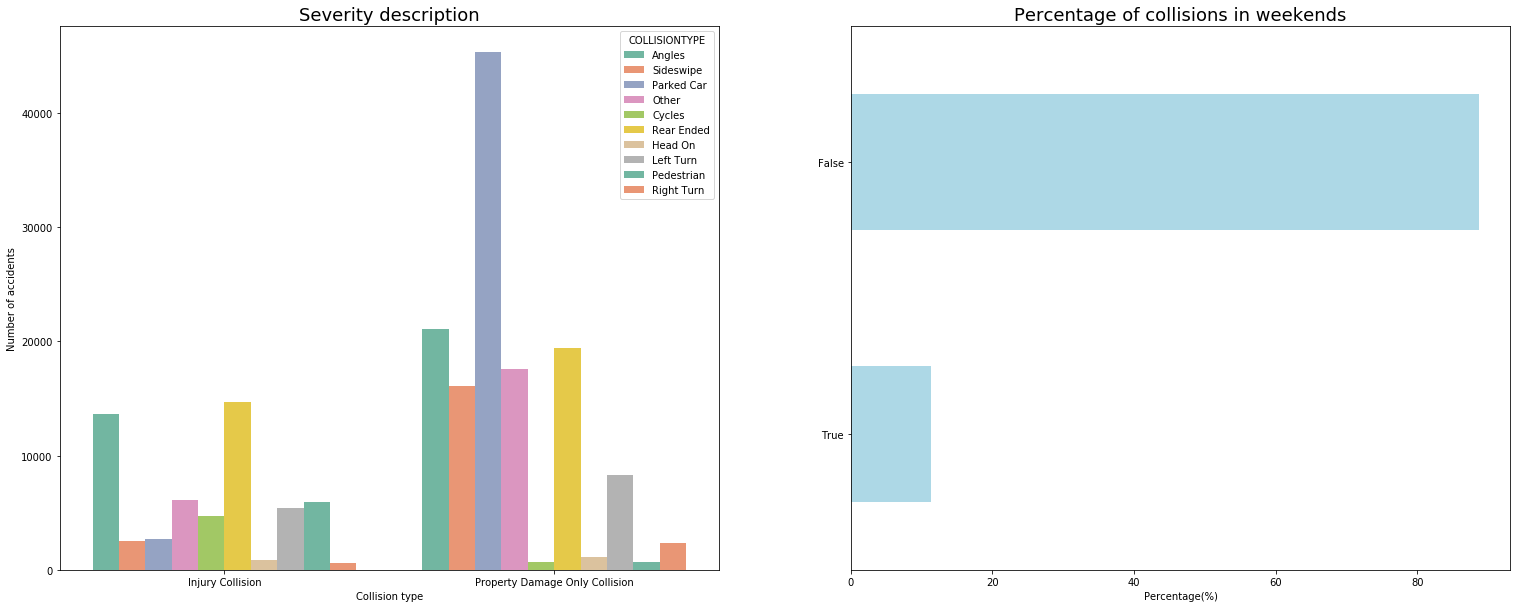

In [6]:
df['DAY'] = pd.to_datetime(df['INCDATE']).dt.dayofweek
df['WEEKEND'] = df['DAY'] > 5 
df['WEEKEND'].rename({'False':'Weekday', 'True':'Weekend'}, inplace=True)

df['DAY'] = pd.to_datetime(df['INCDATE']).dt.dayofweek
df['WEEKEND'] = df['DAY'] > 5 
df['WEEKEND'].rename({'False':'Weekday', 'True':'Weekend'}, inplace=True)

plt.figure(figsize=(26, 10))
plt.subplot(1,2,1)
sns.countplot(x="SEVERITYDESC",hue="COLLISIONTYPE", data=df, palette="Set2")
plt.title('Severity description', fontsize=18)
plt.xlabel("Collision type")
plt.ylabel("Number of accidents")

plt.subplot(1,2,2)
df['WEEKEND'].value_counts(ascending=True, normalize=True).mul(100).plot.barh(color='lightblue')
plt.xlabel("Percentage(%)")
plt.title("Percentage of collisions in weekends", fontsize=18)

Here we can observe and explore the dataset.Looking at the graph, more accidents occur on the weekends. Also we notice that in property damage collisions it is parked cars that are mostly hit. Finally, in collisions resulting in injury, major accidents occur due to vehicles rear ending other vehicles or collisions involving pedestrians.  

# Location

Text(0.5, 0, 'Address type')

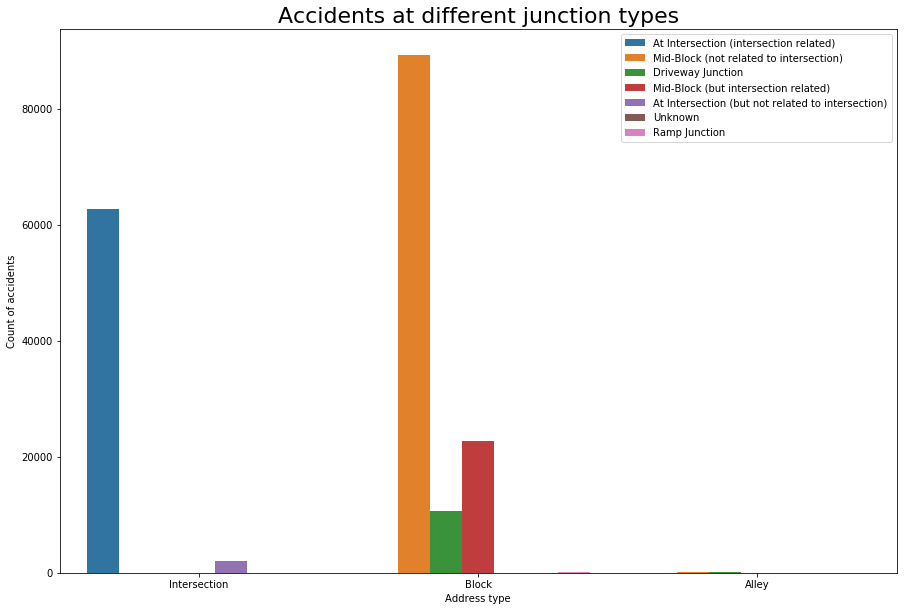

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(x="ADDRTYPE", hue="JUNCTIONTYPE", data=df )
plt.title("Accidents at different junction types", fontsize=22)
plt.legend(loc="upper right")
plt.ylabel("Count of accidents")
plt.xlabel("Address type")

Here we observe that some accidents not primarily involving intersections happen at intersections. 

Similarly, maximum collisions occur near intersections in blocks. While very few accidents occur in alleyways. 

# Human factors 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

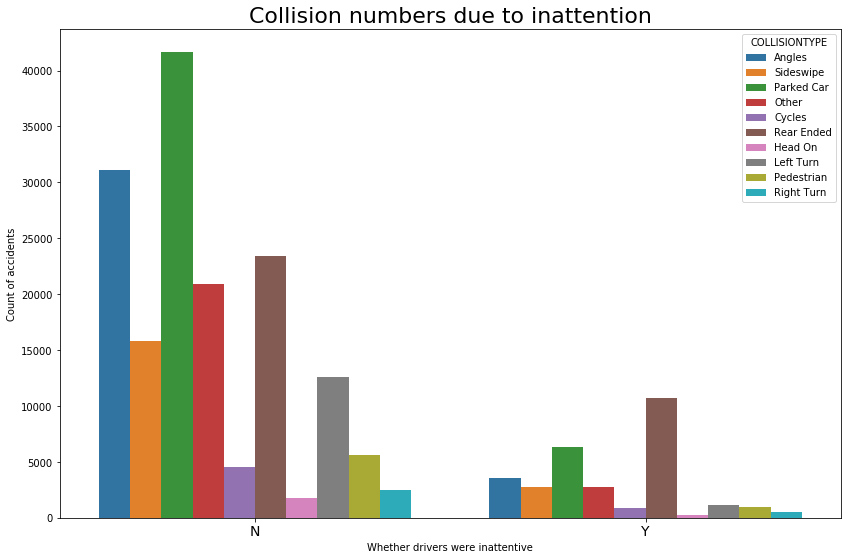

In [8]:
plt.figure(figsize=(14,9))
sns.countplot(x="INATTENTIONIND", hue="COLLISIONTYPE", data=df)
plt.title("Collision numbers due to inattention", fontsize=22)
plt.ylabel("Count of accidents")
plt.xlabel("Whether drivers were inattentive")
df['JUNCTIONTYPE'].unique()

plt.xticks(fontsize=14)

When inattentive, drivers tend to hit parked cars or hit angles. 

# Understanding severity 

The binary classification of severity

    0 - Collision resulting in property damage 
    1 - Collison resulting in injury 

In [9]:
df_feat = df.drop(['OBJECTID','SEVERITYDESC','INCDATE' , 'INCDTTM','INCKEY', 'COLDETKEY', 'REPORTNO', 'LOCATION','STATUS', 'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY', 'SDOT_COLDESC','ST_COLDESC', 'DAY', 'INTKEY',  'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'HITPARKEDCAR','X','Y','SEVERITYCODE.1'],axis=1)
df_feat=df
#Splitting ADDRTYPE to Alley, block and intersection
df_feat[['Alley', 'Block', 'Intersection']] = pd.get_dummies(df_feat['ADDRTYPE'])
df_feat.drop(['ADDRTYPE'], axis=1, inplace=True)

#Splitting COLLISIONTYPE
df_feat[pd.get_dummies(df_feat['COLLISIONTYPE']).columns] = pd.get_dummies(df_feat['COLLISIONTYPE'])
df_feat.drop(['COLLISIONTYPE'], axis=1, inplace=True)

#Splitting JUNCTIONTYPE
df_feat[pd.get_dummies(df_feat['JUNCTIONTYPE']).columns] = pd.get_dummies(df_feat['JUNCTIONTYPE'])
df_feat.drop(['JUNCTIONTYPE'], axis=1, inplace=True)

#Splitting WEATHER
df_feat[pd.get_dummies(df_feat['WEATHER']).columns] = pd.get_dummies(df_feat['WEATHER'])
df_feat.drop(['WEATHER'], axis=1, inplace=True)

#Splitting ROADCOND
df_feat[pd.get_dummies(df_feat['ROADCOND']).columns] = pd.get_dummies(df_feat['ROADCOND'])
df_feat.drop(['ROADCOND'], axis=1, inplace=True)

#Splitting LIGHTCOND
df_feat[pd.get_dummies(df_feat['LIGHTCOND']).columns] = pd.get_dummies(df_feat['LIGHTCOND'])
df_feat.drop(['LIGHTCOND'], axis=1, inplace=True)

df_feat['INATTENTIONIND'] = df_feat['INATTENTIONIND'].map({'Y': '1', 'N': '0'})
df_feat['SEVERITYCODE'] = df_feat['SEVERITYCODE'].map({2: 1, 1: 0})
df_feat['INATTENTIONIND'] = df_feat['INATTENTIONIND'] .astype('int64')
#df_feat['UNDERINFL'] = df_feat['UNDERINFL'].map({'Y': 1, 'N': 0, 'nan': 0})
#df_feat['SPEEDING'] = df_feat['SPEEDING'].map({'Y': 1, 'N': 0})
df_feat['WEEKEND']  = df_feat['WEEKEND'].astype('int64')

In [10]:
df_feat[['SEVERITYCODE', 'Intersection', 'Alley', 'Block']].corr().style.background_gradient(cmap='Reds').format("{:.3f}")

,SEVERITYCODE,Intersection,Alley,Block
SEVERITYCODE,1.000,0.199,-0.026,-0.185
Intersection,0.199,1.000,-0.044,-0.970
Alley,-0.026,-0.044,1.000,-0.085
Block,-0.185,-0.970,-0.085,1.000


In [11]:
df_feat[['SEVERITYCODE', 'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']].corr().style.background_gradient(cmap='Blues').format("{:.3f}")


,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000,0.131,0.246,0.214,-0.055
PERSONCOUNT,0.131,1.000,-0.023,-0.039,0.381
PEDCOUNT,0.246,-0.023,1.000,-0.017,-0.261
PEDCYLCOUNT,0.214,-0.039,-0.017,1.000,-0.254
VEHCOUNT,-0.055,0.381,-0.261,-0.254,1.000


Above, the data highlights that maximum injury collisons occur at intersections with pedestrians and cyclists.

# Train & Test Sets and Feature Selection

In [12]:
df_feat.corr().style.background_gradient(cmap='Blues').format("{:.3f}")

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [13]:
df_feat = df_feat[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','SDOT_COLCODE','PEDROWNOTGRNT','Intersection', 'Cycles', 'Pedestrian', 'At Intersection (intersection related)']]
X = df_feat.drop(['SEVERITYCODE'],axis=1)
y = df_feat['SEVERITYCODE']
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8,test_size=0.2)
from sklearn.metrics import accuracy_score

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
yhat_lr=lr.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Support Vector Machine

In [18]:
from sklearn import svm
clf = svm.SVC(kernel = "linear")
clf.fit(X_train, y_train)
yhat_svm = clf.predict(X_test)

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy", max_depth=10)
dt.fit(X_train, y_train)
yhat_dt = dt.predict(X_test)

# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_estimators=100, criterion="entropy")
m.fit(X_train, y_train)
yhat_rfc = m.predict(X_test)

# XGBoost 

In [20]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
yhat_xgb = model.predict(X_test)

# Results 

In [21]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1lr = f1_score(y_test, yhat_lr)
f1dt = f1_score(y_test, yhat_dt)
f1rf = f1_score(y_test, yhat_rfc)
f1svm = f1_score(y_test, yhat_svm)
f1xgb = f1_score(y_test, yhat_xgb)

acclr = accuracy_score(y_test, yhat_lr)
accdt = accuracy_score(y_test, yhat_dt)
accrf = accuracy_score(y_test, yhat_rfc)
accsvm = accuracy_score(y_test, yhat_svm)
accxgb = accuracy_score(y_test, yhat_xgb)

plr = precision_score(y_test, yhat_lr)
pdt = precision_score(y_test, yhat_dt)
prf = precision_score(y_test, yhat_rfc)
psvm = precision_score(y_test, yhat_svm)
pxgb = precision_score(y_test, yhat_xgb)

rlr = recall_score(y_test, yhat_lr)
rdt = recall_score(y_test, yhat_dt)
rrf = recall_score(y_test, yhat_rfc)
rsvm = recall_score(y_test, yhat_svm)
rxgb = recall_score(y_test, yhat_xgb)

data = [['Model', 'Accuracy score', 'F1 score', 'Precision','Recall'],['Logistic Regression', acclr, f1lr, plr, rlr],['Decision Tree',accdt, f1dt,pdt,rdt],['Random Forest',accrf,f1rf,prf,rrf],['Support Vector Machine', accsvm, f1svm, psvm, rsvm],['XGBoost',accxgb, f1xgb, pxgb, rxgb]]
data = DataFrame(data)          
data

,0,1,2,3,4
0,Model,Accuracy score,F1 score,Precision,Recall
1,Logistic Regression,0.752742,0.369837,0.771436,0.24322
2,Decision Tree,0.755824,0.363868,0.816517,0.234094
3,Random Forest,0.755464,0.363186,0.813849,0.233749
4,Support Vector Machine,0.751483,0.312784,0.893306,0.189582
5,XGBoost,0.755798,0.361365,0.821876,0.231597


# Discussion 

Analyzing the dataset, specifically through the data exploration process, there were many observations. 

    1. Maximum collisions occur at intersections on weekdays
    2. Lighting and road conditions have little to no correlation with accidents
    3. Weather conditions do not play a significant role
    4. Maximum accidents occur in blocks before intersections
    5. Being inattentive and being under the influence both cause accidents not one more than the other
    6. In property damaged collisions the maximum damage is to parked cars. 


In this report, I have highlighted the correlation and relationship between collisions/accidents and human, location attributes, and environmental factors. The observations above identify the main variables that impact collisions. I utilized these observations to classify accidents with machine learning models. Different models predicted collisions using different mechanisms. The model with the most accuracy was the "SVM", as it predicted 89.33% of accidents resulting in injury correctly.

The model created, as well as the data, could be used by the government to limit collisons whether by creating specific signals and signs for pedestrians to cross at intersections, or to warn those on the road to be more cautious at intersections. 

# In Conclusion

## To conclude this project and study, the observations above are helpful to understand the relationships between variables and collisions. However, much of the data is unaccounted for, we cannot predict this worldwide without more data.The observations highlighted that human and weather factors did not influence collisions as opposed to location attributes. More data on accidents and collisions in other parts of the world would improve the accuracy of predictions. 